Computed Visibility: 0.89


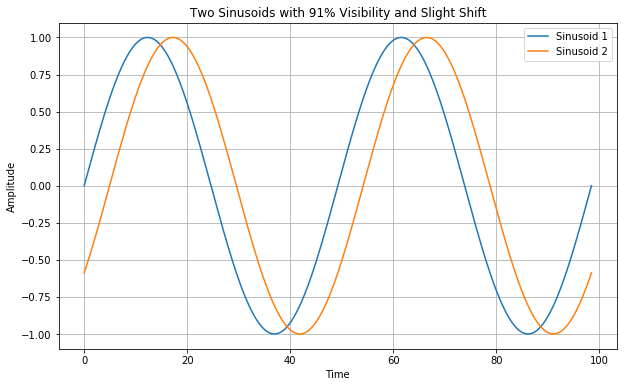

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 49.235
f = 1 / T
shift = 0.1 * T  # 10% of the period
A = 1  # Amplitude of the sinusoids

# Time array
t = np.linspace(0, 2 * T, 1000)

# Generate sinusoids
sin1 = A * np.sin(2 * np.pi * f * t)
sin2 = A * np.sin(2 * np.pi * f * (t - shift))

# Combined signal
#combined_signal = sin1 + sin2

# Calculate visibility


# Print visibility
print(f'Computed Visibility: {visibility:.2f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, sin1, label='Sinusoid 1')
plt.plot(t, sin2, label='Sinusoid 2')
#plt.plot(t, combined_signal, label='Combined Signal', linestyle='--')
plt.title('Two Sinusoids with 91% Visibility and Slight Shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Fitted Amplitude: 9.85
Fitted Frequency: 0.020207
Fitted Phase: -0.14
Fitted Offset: 10.99
Computed Visibility: 0.90


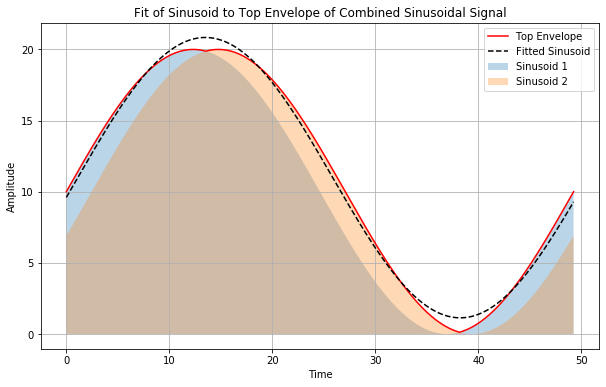

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define parameters
T = 49.235
f = 1 / T
shift = 0.1**1/2 * T  # 10% of the period
A = 10  # Amplitude of the sinusoids

# Time array
t = np.linspace(0, 1 * T, 1000)

# Generate sinusoids
sin1 = A * np.sin(2 * np.pi * f * t)+10
sin2 = A * np.sin(2 * np.pi * f * (t - shift))+10

# Extract top envelope
top_envelope = np.maximum(sin1, sin2)

# Define the sinusoidal function for fitting
def sinusoid(t, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + offset

# Initial guess for the parameters
initial_guess = [A, f, 0, 0]

# Fit the sinusoid to the top envelope
params, params_covariance = curve_fit(sinusoid, t, top_envelope, p0=initial_guess)

# Extract fitted parameters
fitted_amplitude, fitted_frequency, fitted_phase, fitted_offset = params

# Compute fitted sinusoid
fitted_signal = sinusoid(t, *params)

# Compute visibility from the fitted sinusoid
max_val = np.max(fitted_signal)
min_val = np.min(fitted_signal)
visibility = (max_val - min_val) / (max_val + min_val)

print(f'Fitted Amplitude: {fitted_amplitude:.2f}')
print(f'Fitted Frequency: {fitted_frequency:.6f}')
print(f'Fitted Phase: {fitted_phase:.2f}')
print(f'Fitted Offset: {fitted_offset:.2f}')
print(f'Computed Visibility: {visibility:.2f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(t, 0, sin1, alpha=0.3, label='Sinusoid 1')
plt.fill_between(t, 0, sin2, alpha=0.3, label='Sinusoid 2')
plt.plot(t, top_envelope, label='Top Envelope', color='red')
plt.plot(t, fitted_signal, label='Fitted Sinusoid', linestyle='--', color='black')
plt.title('Fit of Sinusoid to Top Envelope of Combined Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Fitted Amplitude: 9.98
Fitted Frequency: 0.020294
Fitted Phase: -0.06
Fitted Offset: 10.93
Computed Visibility: 0.91


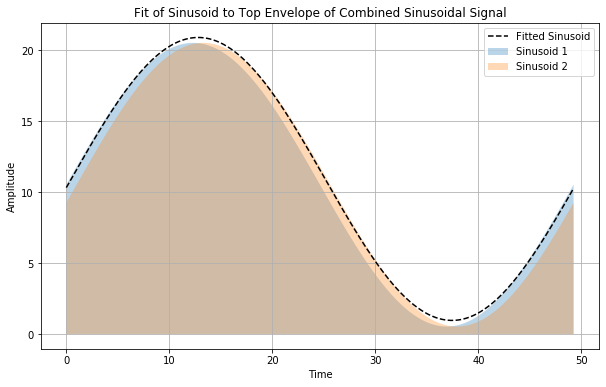

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define parameters
T = 49.235
f = 1 / T
shift = 1*f* T  # 10% of the period
A = 10  # Amplitude of the sinusoids
offset = A / 0.95  # Calculate offset for 91% visibility

# Time array
t = np.linspace(0, 1 * T, 1000)

# Generate sinusoids
sin1 = A * np.sin(2 * np.pi * f * t) + offset
sin2 = A * np.sin(2 * np.pi * f * (t - shift)) + offset

# Extract top envelope
top_envelope = np.maximum(sin1, sin2)

# Define the sinusoidal function for fitting
def sinusoid(t, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + offset

# Initial guess for the parameters
initial_guess = [A, f, 0, offset]

# Fit the sinusoid to the top envelope
params, params_covariance = curve_fit(sinusoid, t, top_envelope, p0=initial_guess)

# Extract fitted parameters
fitted_amplitude, fitted_frequency, fitted_phase, fitted_offset = params

# Compute fitted sinusoid
fitted_signal = sinusoid(t, *params)

# Compute visibility from the fitted sinusoid
max_val = np.max(fitted_signal)
min_val = np.min(fitted_signal)
visibility = (max_val - min_val) / (max_val + min_val)

print(f'Fitted Amplitude: {fitted_amplitude:.2f}')
print(f'Fitted Frequency: {fitted_frequency:.6f}')
print(f'Fitted Phase: {fitted_phase:.2f}')
print(f'Fitted Offset: {fitted_offset:.2f}')
print(f'Computed Visibility: {visibility:.2f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(t, 0, sin1, alpha=0.3, label='Sinusoid 1')
plt.fill_between(t, 0, sin2, alpha=0.3, label='Sinusoid 2')
#plt.plot(t, top_envelope, label='Top Envelope', color='red')
plt.plot(t, fitted_signal, label='Fitted Sinusoid', linestyle='--', color='black')
plt.title('Fit of Sinusoid to Top Envelope of Combined Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

0.8896248507780016


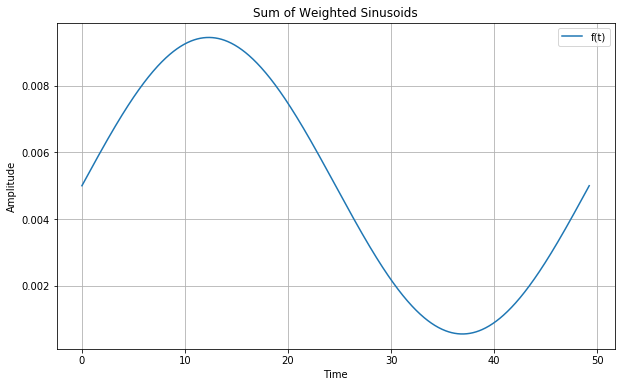

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define parameters
delta = 0.90  # Assuming Δ is 1, modify this if it has a different value
sigma = 78  # Standard deviation for the normal distribution
mu = 0  # Mean for the normal distribution
step = 100  # Step for the summation
x_range = np.arange(-1500, 1500 + step, step)  # Range of x values
T =49.235 # Period

# Time array
t = np.linspace(0, T, 1000)

# Initialize the result array
f = np.zeros_like(t)

# Compute the sum
for x in x_range:
    gaussian = norm.pdf(x, mu, sigma)
    sine_term = delta * np.sin(2 * np.pi * (t / T - x / T)) / 2 + 0.5
    f += gaussian * sine_term
max_val = np.max(f)
min_val = np.min(f)
visibility = (max_val - min_val) / (max_val + min_val)
print(visibility)
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(t, f, label='f(t)')
plt.title('Sum of Weighted Sinusoids')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()